# Homework 3 Part 2

**Due: Wednesday, March 16, 11:59 PM**

* This is an individual assignment.

# Problem 1

In this data you will working with the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine):

In [2]:
from sklearn.datasets import load_wine
wine = load_wine(return_X_y=False)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
import numpy as np
from scipy import spatial
from scipy.spatial.distance import cdist
from numpy.random import permutation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Let's load this data into a ```pandas``` dataframe:

In [9]:
import pandas as pd

df = pd.DataFrame(np.hstack((wine.target[:,np.newaxis],wine.data)), columns=['Class']+wine.feature_names)
df

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Answer the following questions:

1. Implement k-Means for the 13 wine features. Use the silhouette index to determine which value of $k$ best works for this data. Justify your answer.

2. For the *optimal* value of $k$ found in the previous question, predict the clustering labels. Compute the rand index for these estimated labels vs the true labels.

In [10]:
print(df.shape)
dfnp=df.to_numpy()
print(type(dfnp),dfnp.shape)
dfnp[1,2]

(178, 14)
<class 'numpy.ndarray'> (178, 14)


1.78

In [5]:
def KMeans(X, K, MaxIter = 10_000, Thresh = 1e-5, Visualization = True):
    '''This function implements K-Means algorithm. 
    Where the data X will be partitioned into K clusters.
    Data matrix X is of size NxD, where N is the number of points and D the dimension of the data.'''

    #Initialize Cluster Centers by drawing Randomly from Data (can use other
    # methods for initialization...)
    
    #number of data points
    N = X.shape[0] 
    
    #random permutation of numbers 0:N-1
    rp = permutation(N)
    # shuffle the iterator range(0,N)
    
    #select first K data points sorted according to rp
    centers = X[rp[0:K], :] # this should be KxD
    
    if Visualization:
        fig = plt.figure()
        plt.subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1],c='b')
        plt.plot(centers[:,0],centers[:,1],'xr',markersize=20)
        plt.title('Randomly select K='+str(K)+' data points as Centroids')
        plt.show()
    
    diff    = np.inf;
    iter    = 0;
    while((diff > Thresh) & (iter < MaxIter)):
        #Assign data to closest cluster representative (using Euclidean distance)
        D = cdist(X, centers, metric='mahalanobis') # will be an array of size NxK
        
        L = np.argmin(D, axis=1) # this will be an array of size Nx1
        

        # Visualization
        if Visualization:
            plt.subplot(1,2,1)
            plt.scatter(X[:,0],X[:,1],c=L)
            plt.plot(centers[:,0],centers[:,1],'xr',markersize=20)
            plt.title('Membership Assignment')
            
        #Update cluster centers
        centersPrev = centers.copy()
        for i in range(K):
            centers[i,:]=np.mean(X[L==i, :], axis=0)

        # Visualization
        if Visualization:
            plt.subplot(1,2,2)
            plt.scatter(X[:,0],X[:,1],c=L)            
            plt.plot(centers[:,0],centers[:,1],'xr',markersize=20)
            plt.title('Update Cluster Centroids')
            plt.pause(1)
        
        #Update diff & iteration count for stopping criteria
        diff = np.linalg.norm(centersPrev - centers)
        iter = iter+1
    return centers, L

# Plotting function for synthetically generated data
def Plotting(X, true_labels, L, name):
    if len(true_labels)>0:
        fig = plt.figure(figsize=(12,4))
        fig.add_subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1],c=true_labels)
        plt.title(name)
    else:
        fig = plt.figure(figsize=(12,4))
        fig.add_subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1],c='b')
        plt.title(name)
    fig.add_subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=L)
    plt.title("K-Means Clustering Results")

In [45]:
def KMeans_noplot(X, K, MaxIter = 10_000, Thresh = 1e-5, Visualization = True):
    '''This function implements K-Means algorithm. 
    Where the data X will be partitioned into K clusters.
    Data matrix X is of size NxD, where N is the number of points and D the dimension of the data.'''

    #Initialize Cluster Centers by drawing Randomly from Data (can use other
    # methods for initialization...)
    
    #number of data points
    N = X.shape[0] 
    
    #random permutation of numbers 0:N-1
    rp = permutation(N)
    # shuffle the iterator range(0,N)
    
    #select first K data points sorted according to rp
    centers = X[rp[0:K], :] # this should be KxD
    

    diff    = np.inf;
    iter    = 0;
    while((diff > Thresh) & (iter < MaxIter)):
        #Assign data to closest cluster representative (using Euclidean distance)
        D = cdist(X, centers, metric='mahalanobis') # will be an array of size NxK
        
        L = np.argmin(D, axis=1) # this will be an array of size Nx1
        


        #Update cluster centers
        centersPrev = centers.copy()
        for i in range(K):
            centers[i,:]=np.mean(X[L==i, :], axis=0)


        #Update diff & iteration count for stopping criteria
        diff = np.linalg.norm(centersPrev - centers)
        iter = iter+1
    return centers, L

In [11]:
X_df=dfnp[:,1:14]
Target=dfnp[:,0]
print(X_df.shape,Target.shape)
#KMeans(X_df, 3, MaxIter = 10_000, Thresh = 1e-5, Visualization = True)[1]

(178, 13) (178,)


k that maximizes the Silhouette Index is  3


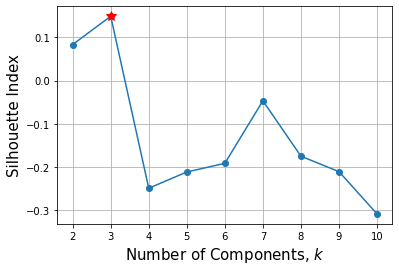

In [40]:
from sklearn.metrics import silhouette_score
kvalues=range(2,11)
s=[]
for k in kvalues:
    _, labels, = KMeans_noplot(X_df, k, MaxIter = 10_000, Thresh = 1e-5, Visualization = True)
    #labels = np.argmax(pZ_X, axis=1)
#     GMM = GaussianMixture(n_components=k, random_state=0).fit(X)
#     labels = GMM.predict(X)
    s+= [silhouette_score(X_df, labels)]
    
koptimal = kvalues[np.argmax(s)]
print('k that maximizes the Silhouette Index is ', koptimal)
plt.plot(kvalues,s,'-o'); plt.grid()
plt.plot(koptimal,s[np.argmax(s)],'*r',ms=10)
plt.xlabel('Number of Components, $k$',size=15)
plt.ylabel('Silhouette Index',size=15);

As the picture shows, 3 is good.

### rand index

In [43]:
from sklearn.metrics import adjusted_rand_score

_, labels, = KMeans_noplot(X_df, 3, MaxIter = 10_000, Thresh = 1e-5, Visualization = True)

adjusted_rand_score(Target, labels)

0.8625485319615126

# Problem 2

Build a Python function to implement the $k$-Nearest Neighbors ($k$-NN) algorithm using Euclidean distance. 

* You should code this function on your own.
* You are allowed to use any needed functions from ```numpy```.
* You are allowed to use the function ```cdist``` from ```scipy.spatial.distance```.

In [61]:
from scipy.spatial.distance import cdist
import heapq
def KNN(X,k,labels, new_data_point):
    #distances =  cdist(X, new_data_point, metric='mahalanobis')
    labels=labels.astype(np.int64)
    distances = np.linalg.norm(X - new_data_point, axis=1)
    nearest_neighbor_ids = distances.argsort()[:k]
    #indexofKNN=distances.where(nearest_neighbor_ids)
    #indexofKNN=np.argpartition(distances,-K)[-K:]
    #LabelofKNN=labels[indexofKNN]
    LabelofKNN=labels[nearest_neighbor_ids]    
    newlabel=np.argmax(np.bincount(LabelofKNN))
    return newlabel

In [13]:
#test
KNN(X_df,3,Target,X_df[1,:])

1

# Problem 3
In this problem you will be working with **Breast cancer wisconsin (diagnostic) dataset** from the UCI ML repository, also available in ```scikit-learn```. Let's load the data:

In [14]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer(return_X_y=False)

print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

For this problem, you will only be working with the radius and texture features:

In [16]:
X = dataset.data[:,:2]
y = dataset.target
print(X.shape,y.shape)

(569, 2) (569,)


Answer the following questions:

1. Partition the data into training and test using 70/30 partition, respectively.

2. Train a Naive Bayes Classifier using the training data. Using the test data, evaluate the classifier performance using accuracy and confusion matrix.

3. Train a $k$-NN classifier with $k=3$ using the training data. Using the test data, evaluate the classifier performance using accuracy and confusion matrix.

4. From the results you obtained in 2 and 3, which model performs best? Explain your reasoning.

5. Implement 4-fold cross-validation to find out the best value of $k$ that maximizes the model's accuracy.


Utils:
* You can use the functions ```confusion_matrix``` and ```accuracy_score``` from the module ```sklearn.metrics```.
* You can use the functions ```train_test_split``` and ```KFold``` from the module ```sklearn.model_selection```.

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

1. Partition the data into training and test using 70/30 partition, respectively.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_test.shape,X_train.shape,y_test.shape)

(171, 2) (398, 2) (171,)


2. Train a Naive Bayes Classifier using the training data. Using the test data, evaluate the classifier performance using accuracy and confusion matrix.

In [74]:
print(y_train.shape)
print(X_train[y_train==1,:].shape,X_train[y_train==0,:].shape)

(398,)
(249, 2) (149, 2)


In [38]:
from scipy.stats import multivariate_normal # multivariate form of stats.norm

def NBC(X_train,y_train,X_test,y_test):
    #### Estimate parameters #历史原因命名乱了
    # Means
    mu1 = np.mean(X_train[y_train==0,:], axis=0)
    #print('Mean of Class 0: ', mu1)
    mu2 = np.mean(X_train[y_train==1,:], axis=0)
    #print('Mean of Class 1: ', mu2)
    # Covariances
    cov1 = np.cov(X_train[y_train==0,:].T) # expects the data to be DxN
    #print('Covariance of Class 0: ',cov1)
    cov2 = np.cov(X_train[y_train==1,:].T)
    #print('Covariance of Class 1: ',cov2)
    #### Estimate Prior Probabilities
    N = X_train.shape[0]
    N1=X_train[y_train==0,:].shape[0]
    N2=X_train[y_train==1,:].shape[0]
    #print(N,N1,N2)
    p1 = N1/N
    #print('Probability of  Class 0: ',p1)
    p2 = N2/N
    #print('Probability of  Class 1: ',p2)

    y1 = multivariate_normal.pdf(X_test, mean=mu1, cov=cov1) #P(x|C1)
    y2 = multivariate_normal.pdf(X_test, mean=mu2, cov=cov2) #P(x|C2)
    # Let's take a look at the posterior distributions: they represent our classification decision
    pos1 = y1*p1 / (y1*p1 + y2*p2) # P(C1|x) = P(x|C1)*P(C1) / (P(x|C1)*P(C1) + P(x|C2)*P(C2))
    pos2 = y2*p2 / (y1*p1 + y2*p2)
    return(np.array(pos1<pos2))


In [89]:
from sklearn.metrics import confusion_matrix
result_NBC=NBC(X_train,y_train,X_test,y_test)+0
#print(result_NBC)
print(confusion_matrix(y_test,result_NBC))
print(2*50/(2*50+4+13))


[[ 50  13]
 [  4 104]]
0.8547008547008547


3. Train a $k$-NN classifier with $k=3$ using the training data. Using the test data, evaluate the classifier performance using accuracy and confusion matrix.

In [66]:
#KNN(X,K,labels, new_data_point):
result_KNN=np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    result_KNN[i]=KNN(X_train,3,y_train,X_test[i,:])
#print(X_test.shape[0],result_KNN,y_test)
print(confusion_matrix(y_test,result_KNN))
print(2*48/(2*48+15+8))

[[ 48  15]
 [  8 100]]
0.8067226890756303


4. From the results you obtained in 2 and 3, which model performs best? Explain your reasoning.   

    Naive Bayes Classifier, because it has better F1 socre. 0.85>0.81

5. Implement 4-fold cross-validation to find out the best value of $k$ that maximizes the model's accuracy.


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import linregress

In [98]:
'''kf = KFold(n_splits=4)
print(kf)
for M in range(1,10):
    F1score=0
    for X_traini,X_vali in kf.split(X_train):
        #print(y_train[X_traini])
        result_NBC_K=NBC(X_train[X_traini,:],y_train[X_traini],X_train[X_vali,:],y_train[X_vali])+0
        #print(result_NBC_K,y_train[X_vali])
        a=result_NBC_K.astype(int)
        b=y_train[X_vali].astype(int) #我也不知道为什么要加这两句但是不加不行
        #print('When K==',M,'the matricx for')
        #print(confusion_matrix(b,a))
        confu=confusion_matrix(b,a)
        F1score+=2*confu[0,0]/(2*confu[0,0]+confu[0,1]+confu[1,0])/4
    print('for K==',M,'the avarage F1 score is',F1score)不舍得删而已,就当是病历了'''

"kf = KFold(n_splits=4)\nprint(kf)\nfor M in range(1,10):\n    F1score=0\n    for X_traini,X_vali in kf.split(X_train):\n        #print(y_train[X_traini])\n        result_NBC_K=NBC(X_train[X_traini,:],y_train[X_traini],X_train[X_vali,:],y_train[X_vali])+0\n        #print(result_NBC_K,y_train[X_vali])\n        a=result_NBC_K.astype(int)\n        b=y_train[X_vali].astype(int) #我也不知道为什么要加这两句但是不加不行\n        #print('When K==',M,'the matricx for')\n        #print(confusion_matrix(b,a))\n        confu=confusion_matrix(b,a)\n        F1score+=2*confu[0,0]/(2*confu[0,0]+confu[0,1]+confu[1,0])/4\n    print('for K==',M,'the avarage F1 score is',F1score)不舍得删而已,就当是病历了"

In [96]:
kf = KFold(n_splits=4)
print(kf)
for M in range(1,10):
    F1score=0
    for X_traini,X_vali in kf.split(X_train):
        result_KNN=np.zeros(X_train[X_vali,:].shape[0])
        newtest=X_train[X_vali,:]
        for i in range(X_train[X_vali,:].shape[0]):
            result_KNN[i]=KNN(X_train[X_traini,:],M,y_train[X_traini],newtest[i,:])
        #print(confusion_matrix(y_train[X_vali],result_KNN))
        confu=confusion_matrix(y_train[X_vali],result_KNN)
        F1score+=2*confu[0,0]/(2*confu[0,0]+confu[0,1]+confu[1,0])/4
    print('for K==',M,'the avarage F1 score is',F1score)

KFold(n_splits=4, random_state=None, shuffle=False)
for K== 1 the avarage F1 score is 0.8054608585199129
for K== 2 the avarage F1 score is 0.7668332884295326
for K== 3 the avarage F1 score is 0.8165105495404221
for K== 4 the avarage F1 score is 0.8124288617886178
for K== 5 the avarage F1 score is 0.8218893148427462
for K== 6 the avarage F1 score is 0.8230592542314992
for K== 7 the avarage F1 score is 0.835997578148407
for K== 8 the avarage F1 score is 0.8330042586140146
for K== 9 the avarage F1 score is 0.8325796580440543


the besk K is 7

# Problem 4

Consider the following data in a 2-dimensional feature space, $x_1$ and $x_2$, and its corresponding labels, $t$:

|$x_1$|$x_2$|$t$|
|--|--|--|
|0|0|0|
|0.1|0|0|
|-0.1|0.1|0|
|0.05|0.1|0|
|-0.1|0|0|
|0.05|-0.1|0|
|1|1|1|
|1.2|0.9|1|
|0.9|1.1|1|
|0.8|0.9|1|
|2|1|1|
|1.5|0.9|1|

Answer the following questions:

1. Find the Fisher's linear discriminant function. 

2. Specify all the parameters of the discriminant. 

In [97]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [134]:
def fisherDiscriminant(data,t):
    data1 = data[t==0,:]
    data2 = data[t==1,:]
    mean1 = np.atleast_2d(np.mean(data1,0))
    mean2 = np.atleast_2d(np.mean(data2,0))
    Sw1 = np.dstack([(data1[i,:]-mean1).T@(data1[i,:]-mean1) for i in range(data1.shape[0])])
    Sw2 = np.dstack([(data2[i,:]-mean2).T@(data2[i,:]-mean2) for i in range(data2.shape[0])])
    Sw = np.sum(Sw1,2) + np.sum(Sw2,2)
    w = np.linalg.inv(Sw)@(mean2 - mean1).T
    w = w/np.linalg.norm(w)
    data_t = data@w
    return w, data_t

def discriminant(data, labels, v):
    v_perp = np.array([v[1], -v[0]])
    b = ((np.mean(data[labels==0,:],axis=0)+np.mean(data[labels==1,:],axis=0))/2)@v
    lambda_vec = np.linspace(-3,3,len(data))
    v_line = lambda_vec * v
    decision_boundary = b * v + lambda_vec * v_perp
    return v_line, decision_boundary,b

[[0.09541778]
 [0.99543731]]
[0.54826431]


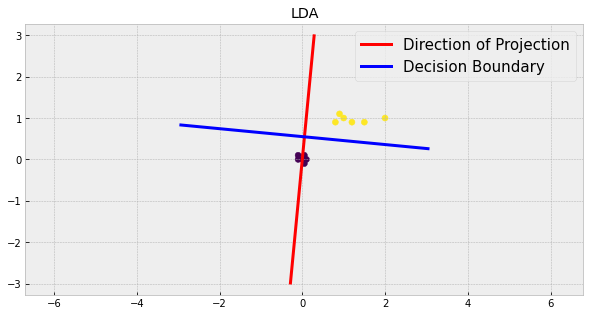

In [135]:
t=np.zeros(12)
t[-6:]=1
labels=t
X=np.array([[0,0],[0.1,0],[-0.1,0.1],[0.05,0.1],[-0.1,0],[0.05,-0.1],[1,1],[1.2,0.9],[0.9,1.1],[0.8,0.9],[2,1],[1.5,0.9]])
v, Y = fisherDiscriminant(X,t)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=labels)

v_line, decision_boundary ,b= discriminant(X, labels, v);

plt.plot(v_line[0], v_line[1], 'red', linewidth=3, label='Direction of Projection')
plt.plot(decision_boundary[0,:], decision_boundary[1,:],'blue',linewidth=3, label='Decision Boundary')
plt.title('LDA'); plt.axis('equal'); plt.legend(loc='best',fontsize=15);
print(v)
print(b)


the function is 0.09541778*x1+0.99543731*x2=0.54826431   
w=[[0.09541778]
 [0.99543731]]   
b=[0.54826431]   

## Submit your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.